<a href="https://colab.research.google.com/github/Sri-Pooja00/2203A51341_NLP/blob/main/B1_NLP_A4_2203A51341.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.6493 - loss: 0.6068 - val_accuracy: 0.7944 - val_loss: 0.4442
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.8528 - loss: 0.3494 - val_accuracy: 0.8337 - val_loss: 0.3958
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9122 - loss: 0.2248 - val_accuracy: 0.8255 - val_loss: 0.4335
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9505 - loss: 0.1381 - val_accuracy: 0.8144 - val_loss: 0.5024
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.9760 - loss: 0.0756 - val_accuracy: 0.7957 - val_loss: 0.6275


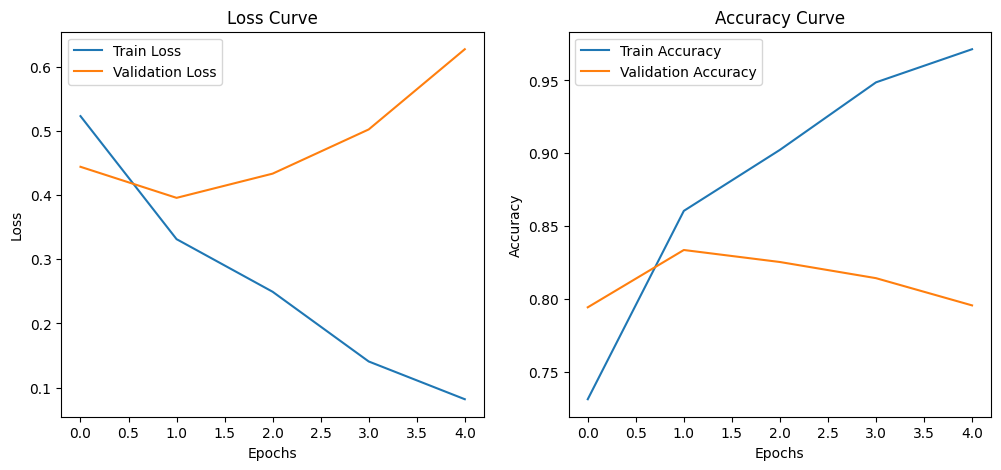

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7938 - loss: 0.6439
Test accuracy: 0.7957199811935425


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=100)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=100)

model = keras.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=32, input_length=100),
    keras.layers.SimpleRNN(32),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

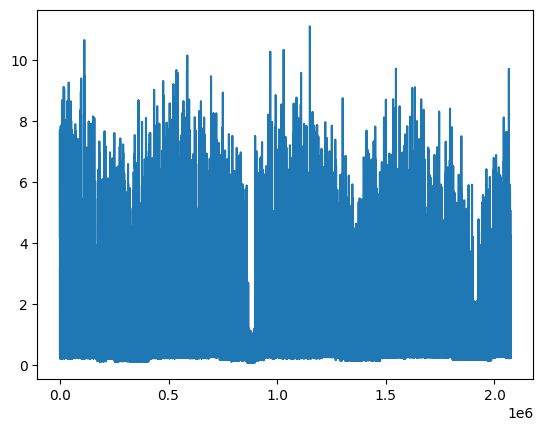

In [15]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/household_power_consumption.txt'

df = pd.read_csv(file_path, sep=';', parse_dates={'dt': ['Date', 'Time']},dayfirst=True, low_memory=False, na_values=['nan','?'], index_col='dt')

df.fillna(df.mean(), inplace=True)

data = df['Global_active_power'].values.astype(float)

plt.plot(data)
plt.show()

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1))

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input # import the Input class
from sklearn.model_selection import train_test_split

model = Sequential()

model.add(Input(shape=(X_train.shape[1], 1)))

model.add(LSTM(50, return_sequences=False))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

plt.plot(data[-len(predicted):], label='True data')
plt.plot(predicted, label='Predicted data')
plt.legend()
plt.show()

In [1]:


import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def generate_data(n_samples=1000, n_features=20):
    X = np.random.rand(n_samples, n_features)
    y = np.random.randint(0, 2, size=(n_samples, 1))
    return X, y

def create_deep_network(activation='sigmoid'):
    model = Sequential()
    model.add(Dense(64, input_dim=20, activation=activation))
    for _ in range(10):
        model.add(Dense(64, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    return model

class GradientMonitorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        grads = []
        for layer in self.model.layers:
            if hasattr(layer, 'kernel'):
                grads.append(tf.reduce_mean(tf.abs(layer.kernel)))
        if grads:
            grad_mean = np.mean([g.numpy() for g in grads])
            print(f"Epoch {epoch+1}: Gradient Mean: {grad_mean:.4f}")

X, y = generate_data()

model = create_deep_network()

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

print("Training the model...")
model.fit(X, y, epochs=5, batch_size=32, callbacks=[GradientMonitorCallback()])

loss, accuracy = model.evaluate(X, y)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Training the model...
Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 0.6984 - accuracy: 0.5080
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4920
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4900
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4920
Test Loss: 0.6936
Test Accuracy: 0.4920
